# 1. Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# 2. Data Loading and Understanding

In [4]:
df = pd.read_csv('Customer_Churn.csv')

In [5]:
df.shape

(7043, 21)

In [6]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2099,2190-BCXEC,Female,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,No
369,3520-FJGCV,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),112.60,8126.65,No
902,2719-BDAQO,Male,0,No,No,17,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,1625.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# remove CustomerID column as it is not necessary for the prediction
df = df.drop(columns = ['customerID'])

In [9]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6802,Female,0,No,No,20,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.1,1879.25,No
3955,Male,0,Yes,No,29,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.9,1332.4,No


In [10]:
# printing all unique values in in all the columns

for column in df.columns:
    print(column, df[column].unique())
    print('-'*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
len(df[df['TotalCharges'] == ' '])

11

In [13]:
# this 11 columns had TotalCharges value as empty string therefore it wasn't converting it to float
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
# replacing all the empty string values to string values of 0.0
df['TotalCharges'] = df['TotalCharges'].replace({' ': '0.0'})

In [15]:
# now converting the String type column ----to---- Float type
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [16]:
# checking the class distribution of Target Column
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 3. Exploratory Data Analysis

## 3.a For Numerical Columns

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5137,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No
4835,Male,0,Yes,No,65,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.25,6812.95,No


In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
def plot_histogram(df, column_name):

    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(col_median, color='green', linestyle='--', label='Median')
    
    plt.legend()
    
    plt.show

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


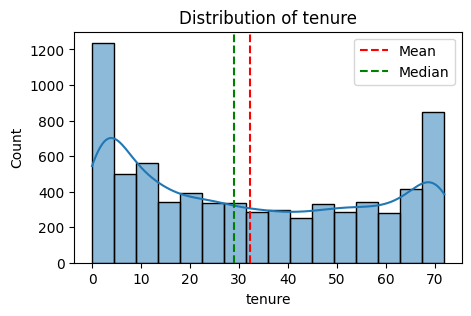

In [23]:
plot_histogram(df, 'tenure')

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


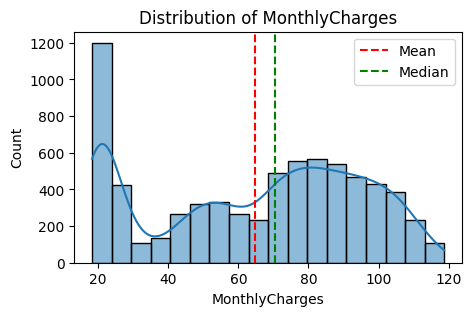

In [24]:
plot_histogram(df, 'MonthlyCharges')

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


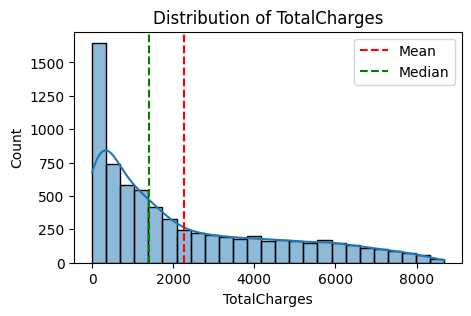

In [25]:
plot_histogram(df, 'TotalCharges')

In [26]:
# the above graph is skewed so we can't use models like LinearRegression, Logistic, SVM beacuse they need Normal Distribution

In [27]:
# We can use StandardScalar to convert this not normally distributed data to Normal Distribution

In [28]:
# But in the case of Tree based models there no necessity of normal distribution of data 

In [29]:
def plt_boxplot(df, column_name):

    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

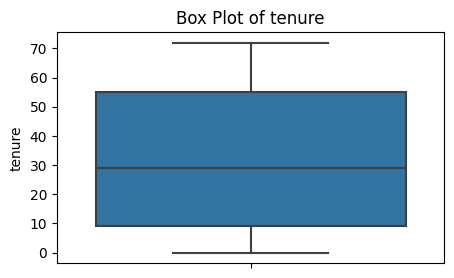

In [30]:
plt_boxplot(df, 'tenure')

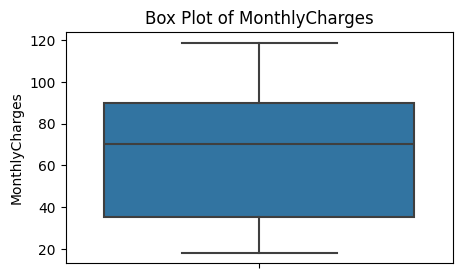

In [31]:
plt_boxplot(df, 'MonthlyCharges')

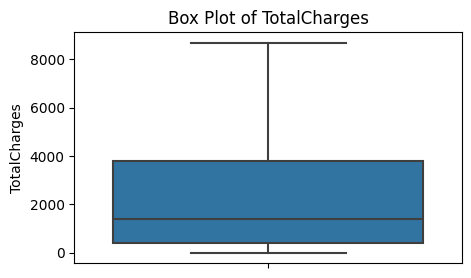

In [32]:
plt_boxplot(df, 'TotalCharges')

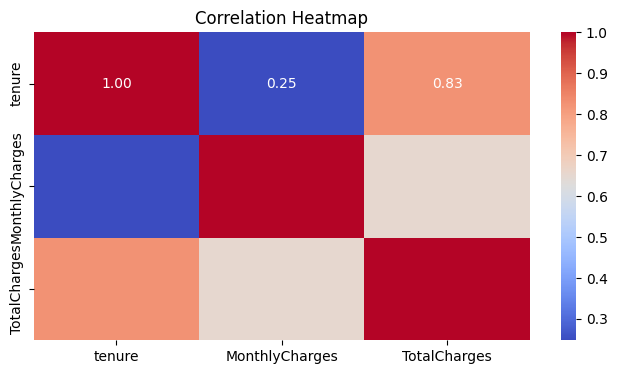

In [33]:
# correlation matrix - Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 3.b For Categorical Columns

In [35]:
# Extracting all the categorical columns
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ['SeniorCitizen'] + object_cols

In [36]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

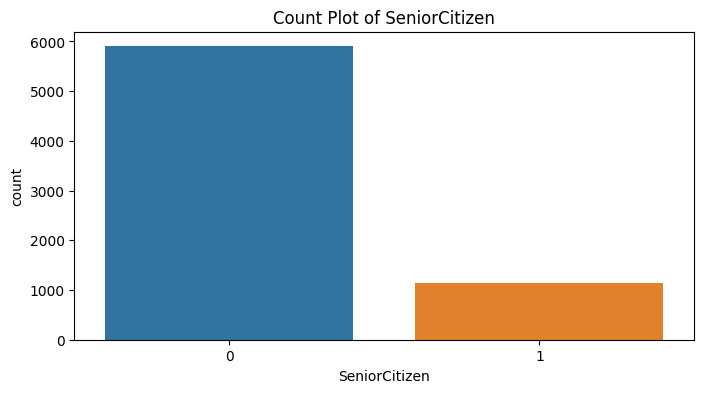

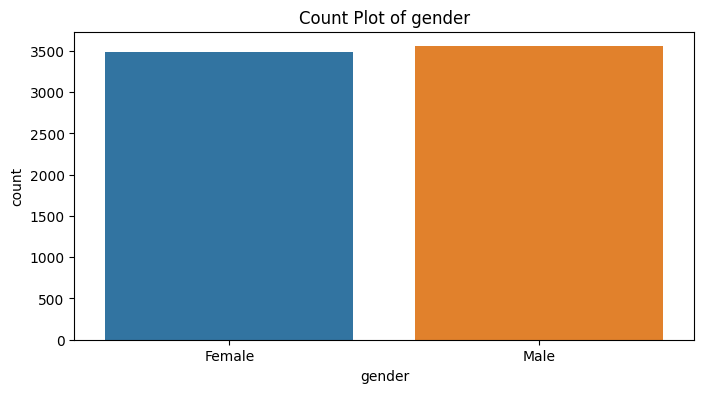

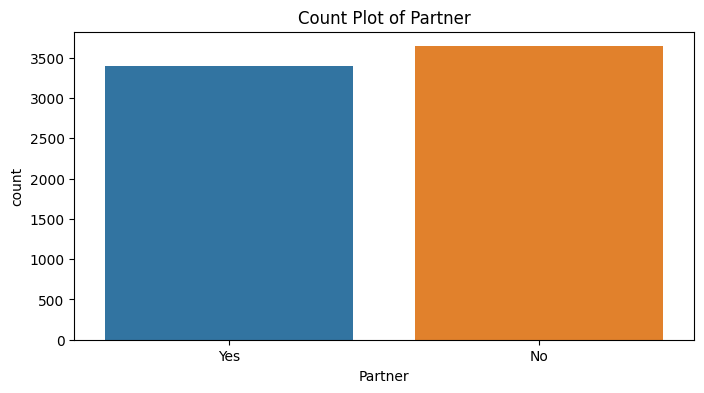

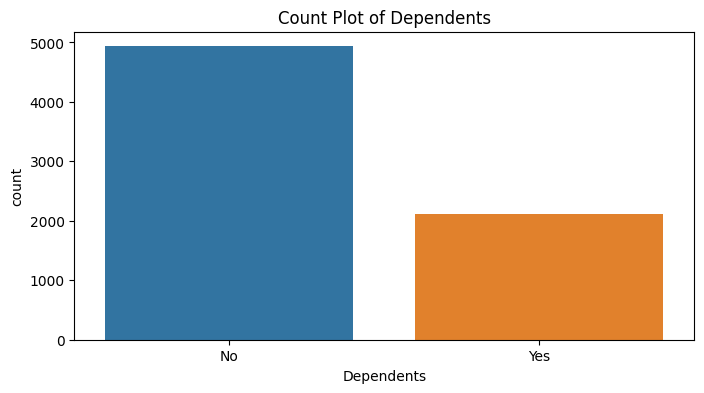

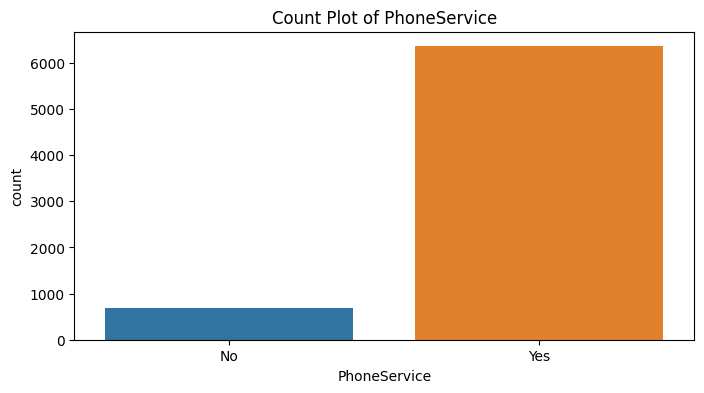

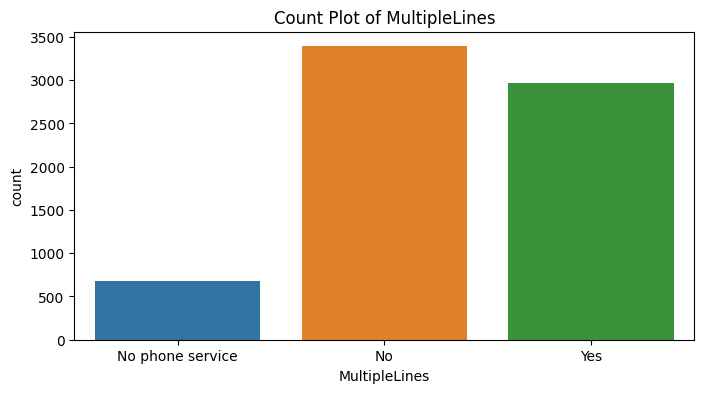

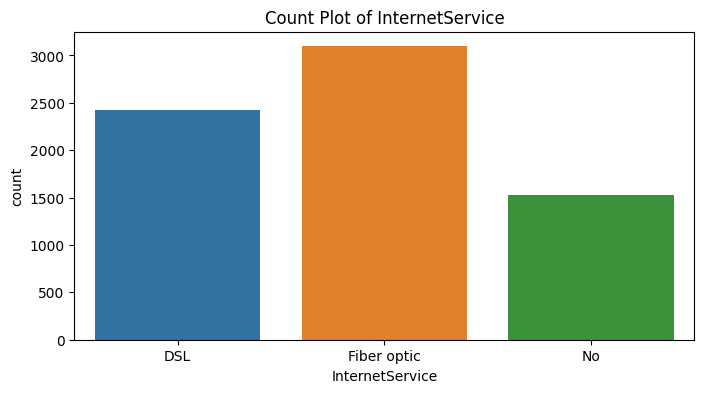

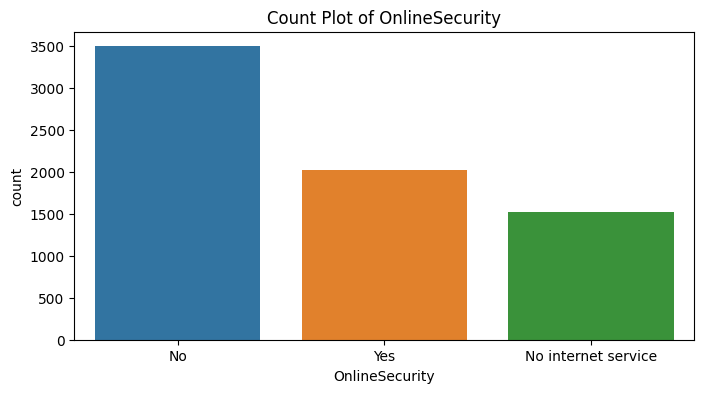

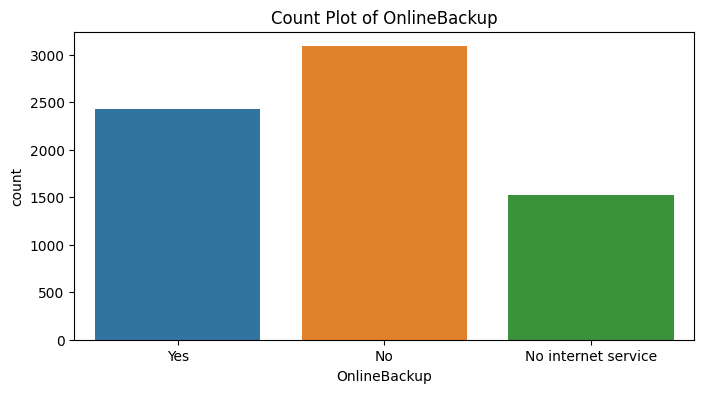

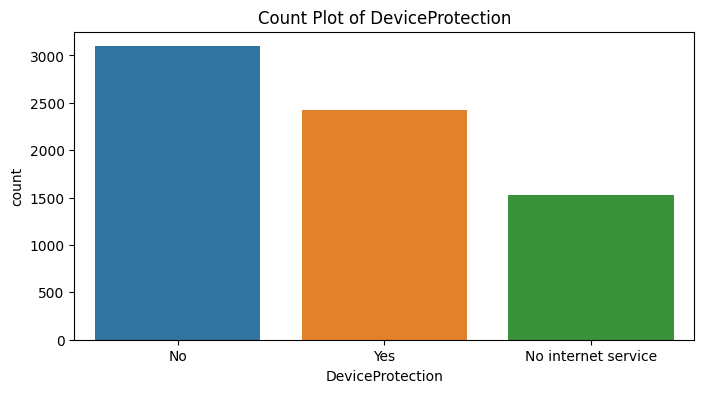

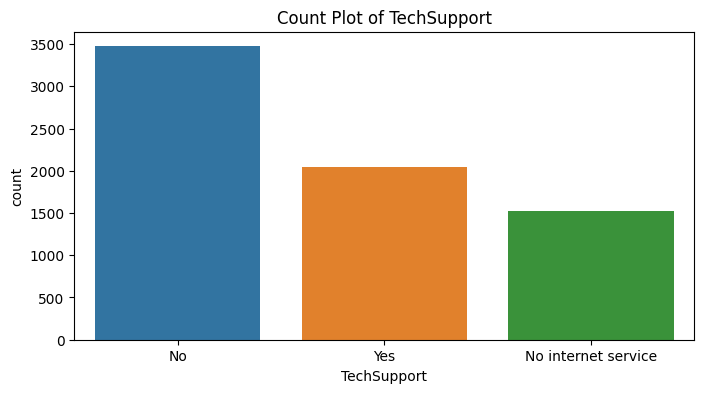

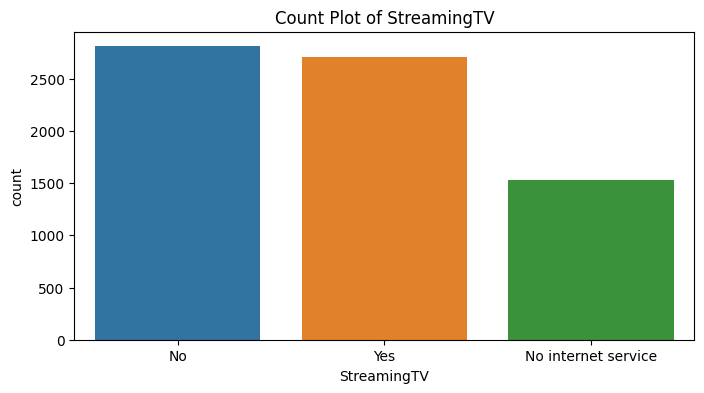

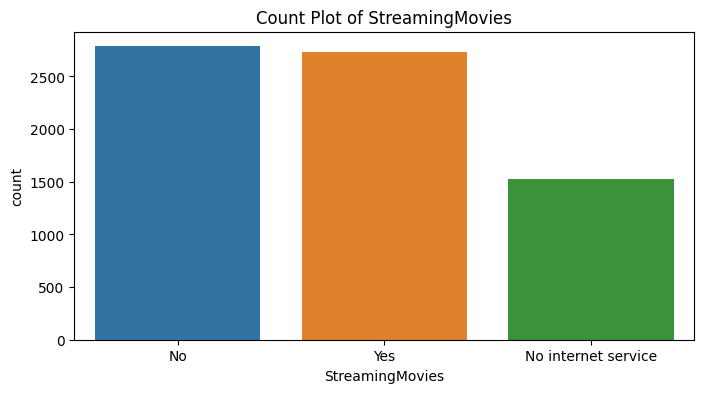

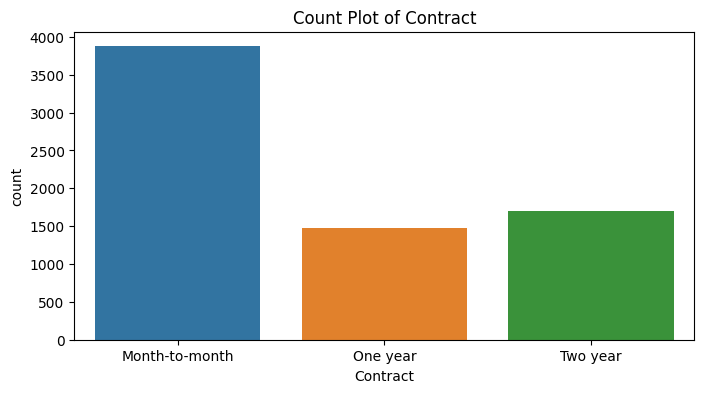

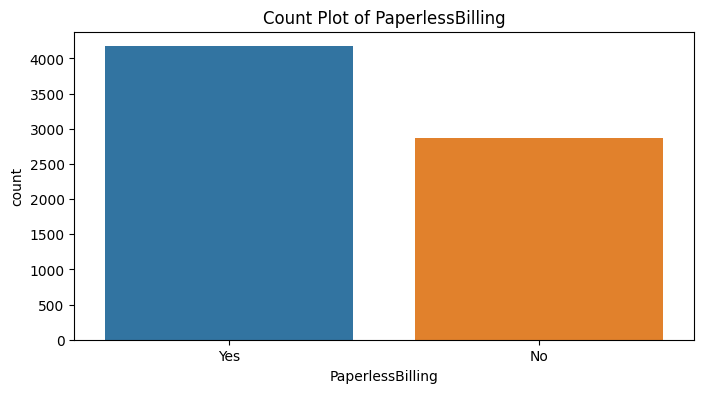

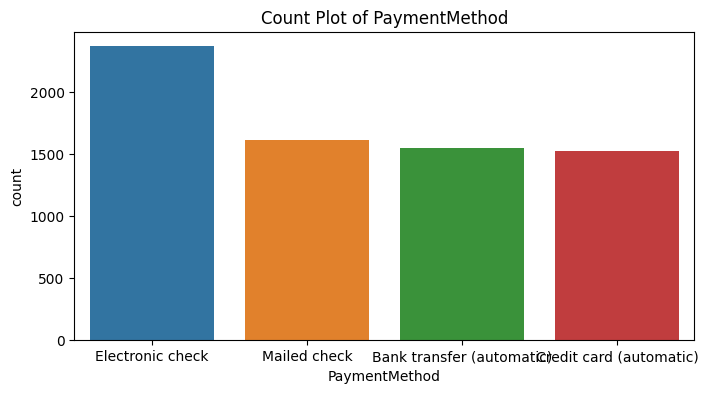

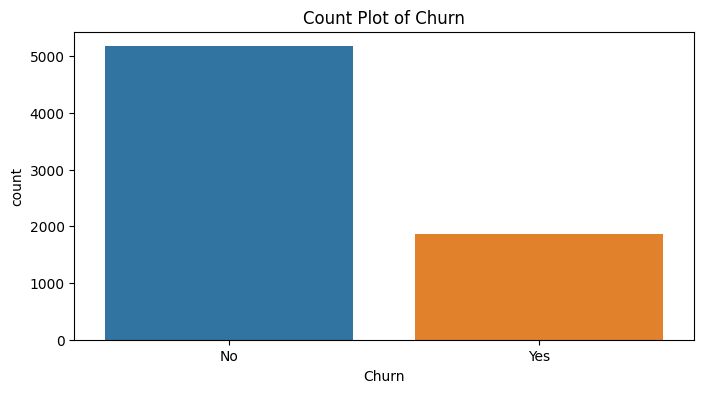

In [37]:
# Creating a countplot for the above columns
for col in object_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show

In [38]:
# Label Encoding of Target Column
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

C:\Users\manis\AppData\Local\Temp\ipykernel_10524\2457893854.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})


In [39]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3731,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,146.65,0
443,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Electronic check,64.80,1166.70,0
1546,Female,0,No,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1128.10,0


In [40]:
# Identifying columns with object datatype
object_columns = df.select_dtypes(include='object').columns

In [41]:
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [42]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

# save the encoders to a pickle file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [43]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

# 4. Splitting the Train and Test Data

In [45]:
df.shape

(7043, 20)

In [46]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
y_train.value_counts()

Churn
0    3635
1    1295
Name: count, dtype: int64

In [49]:
# As we can see there is an imbalance of Data in the Target Column

In [50]:
# To resolve this we will we using -------- Synthetic Minority Oversampling Technique (SMOTE)

In [51]:
# SMOTE is only done on the training data to see that while testing it works well

In [52]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [53]:
y_train_smote.shape

(7270,)

In [54]:
y_train_smote.value_counts()

Churn
0    3635
1    3635
Name: count, dtype: int64

# 5. Model Training

In [56]:
# Dictionary of Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [57]:
# Dictionary to store the Cross Validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print('-'*100)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------------------------------------


In [58]:
cv_scores

{'Decision Tree': array([0.68638239, 0.73177442, 0.85075653, 0.82806052, 0.83218707]),
 'Random Forest': array([0.72627235, 0.78060523, 0.9085282 , 0.9002751 , 0.89683631]),
 'XGBoost': array([0.71664374, 0.75790922, 0.90646492, 0.90508941, 0.89752407])}

In [59]:
# Random Forest gives the best accuracy  compared to other models with default parameters
rfc = RandomForestClassifier(random_state=42)

In [60]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

# 6. Model Evaluation

In [62]:
y_test.value_counts()

Churn
0    1539
1     574
Name: count, dtype: int64

In [63]:
# Evaluation on Test Data
y_pred = rfc.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred))
print('Classification Report:\n ', classification_report(y_test, y_pred))

Accuracy Score:  0.7747278750591576
Confusion Matrix:
  [[1296  243]
 [ 233  341]]
Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.84      0.84      1539
           1       0.58      0.59      0.59       574

    accuracy                           0.77      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.77      0.78      2113



In [64]:
# save the trained model along with the feature names as a pickle file
model_data = {'model': rfc, 'feature_names': x.columns.tolist()}
with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

# 7. Load the saved model and build a predictive system

In [66]:
# load the saved model and the feature names
with open('customer_churn_model.pkl', 'rb') as f:
    model_data = pickle.load(f)
loaded_model = model_data['model']
feature_names = model_data['feature_names']

In [67]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [68]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [69]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}
input_data_df = pd.DataFrame([input_data])
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [70]:
# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

In [71]:
# After encoding using the encoders.pkl file !!
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [72]:
# Make Prediction
prediction = loaded_model.predict(input_data_df)
pred_probability = loaded_model.predict_proba(input_data_df)

print(prediction)

print("Churn" if prediction == 1 else "No Churn")
print('Probability of target being 0 and the target being 1 : ', pred_probability)

[0]
No Churn
Probability of target being 0 and the target being 1 :  [[0.76 0.24]]


**To do:**
1. Implement Hyperparameter Tuining
2. Try Model Selection
3. Try downsampling
4. Try to address the overfitting
5. Try Startified k fold CV